In [12]:
import tushare as ts

In [13]:
pro = ts.pro_api()
pro = ts.pro_api('6e42539d6ba68e372ba02dae96f79f70150074f8c2439dbc25a623e2')

In [18]:
df = pro.weekly(start_date='20190101', end_date='20191101',ts_code='000001.SZ',fields='ts_code,trade_date,close')
df.head(1)

,ts_code,trade_date,close
0,000001.SZ,20191101,16.86


In [21]:
df[['trade_date','ts_code','close']].head()

,trade_date,ts_code,close
0,20191101,000001.SZ,16.86
1,20191025,000001.SZ,16.88
2,20191018,000001.SZ,16.51
3,20191011,000001.SZ,16.81
4,20190930,000001.SZ,15.59


In [32]:
df.dtypes

ts_code        object
trade_date     object
close         float64
dtype: object

In [33]:
df.trade_date = pd.to_datetime(df.trade_date)
df['trade_date'].head()

0   2019-11-01
1   2019-10-25
2   2019-10-18
3   2019-10-11
4   2019-09-30
Name: trade_date, dtype: datetime64[ns]

In [37]:
df1 = df.set_index('trade_date')

In [38]:
df1.sort_index(ascending= True)
df1.head()

,ts_code,close
trade_date,,
2019-11-01,000001.SZ,16.86
2019-10-25,000001.SZ,16.88
2019-10-18,000001.SZ,16.51
2019-10-11,000001.SZ,16.81
2019-09-30,000001.SZ,15.59


In [40]:
df2 = df1[['close']]
df2.head()

,close
trade_date,
2019-11-01,16.86
2019-10-25,16.88
2019-10-18,16.51
2019-10-11,16.81
2019-09-30,15.59


In [22]:
import matplotlib.pylab as plt

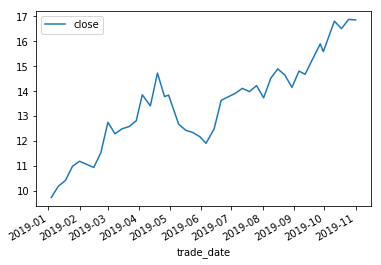

In [42]:
df2.plot()

In [46]:
df2['week'] = df2.index.week
df2['month'] = df2.index.month

In [50]:
week = df2.groupby(['week', 'month']).sum()
week.head()

,,close
week,month,
1,1,9.75
2,1,10.20
3,1,10.43
4,1,11.00
5,2,11.20


In [51]:
#find all the volume traded in the year of 2019
del df2['week']
df2['month'] = df2.index.month
month = df2.groupby(['month']).sum()
month

,close
month,
1,41.38
2,33.69
3,62.97
4,69.65
5,49.65
6,51.83
7,56.26
8,71.97
9,76.32
